In [3]:
import torch

_ = torch.manual_seed(123)
from torchmetrics.image.inception import InceptionScore

inception = InceptionScore()
# generate some images
imgs = torch.randint(0, 255, (20, 3, 299, 299), dtype=torch.uint8)
inception.update(imgs)
print(inception.compute())
# inception.plot()
# inception(torch.randint(0, 255, (100, 3, 299, 299), dtype=torch.uint8))

(tensor(1.0401), tensor(0.0191))


In [2]:
from PIL import Image

img = Image.open(
    "/home/choi/BrainDecoder/outputs/img2img-samples/samples/00000.png"
).convert("RGB")

In [7]:
img.size

(1024, 512)

In [8]:
[5 * ["hi"]]

[['hi', 'hi', 'hi', 'hi', 'hi']]

In [86]:
from PIL import Image, ImageOps
from torchvision import transforms
import numpy as np
from matplotlib import pyplot as plt
from einops import rearrange
import torch

path = "/scratch/choi/dataset/EEG/imageNet_images/n03452741/n03452741_16744.JPEG"
gt_image = Image.open(path).convert("RGB")
# gt_image = ImageOps.invert(gt_image)

transform = transforms.Compose(
    [
        transforms.Resize((512, 512)),
        transforms.PILToTensor(),
        transforms.ConvertImageDtype(float),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)
gt_image_torch = transform(gt_image)
gt_image_torch = torch.clamp((gt_image_torch + 1.0) / 2.0, min=0.0, max=1.0)
gt_image_torch = 255 * rearrange(gt_image_torch, "c h w -> h w c").numpy()

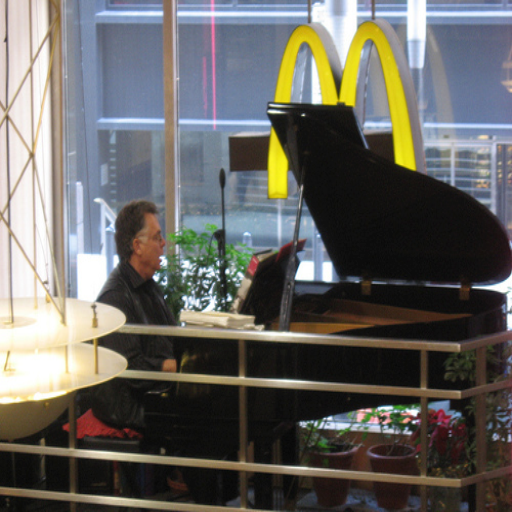

In [87]:
# transforms.ToPILImage()(gt_image_torch)
Image.fromarray(gt_image_torch.astype(np.uint8))

In [88]:
from transformers import AutoTokenizer, CLIPTextModel

model = CLIPTextModel.from_pretrained("openai/clip-vit-base-patch32")
tokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-base-patch32")

inputs = tokenizer(
    ["a photo of a cat", "a photo of a dog"], padding=True, return_tensors="pt"
)

outputs = model(**inputs)
last_hidden_state = outputs.last_hidden_state
pooled_output = outputs.pooler_output  # pooled (EOS token) states

Some weights of the model checkpoint at openai/clip-vit-base-patch32 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.8.layer_norm2.weight', 'vision_model.embeddings.class_embedding', 'vision_model.encoder.layers.9.self_attn.out_proj.bias', 'vision_model.encoder.layers.1.layer_norm2.weight', 'vision_model.encoder.layers.5.mlp.fc2.bias', 'vision_model.encoder.layers.3.mlp.fc1.bias', 'vision_model.encoder.layers.11.self_attn.k_proj.weight', 'vision_model.encoder.layers.10.layer_norm1.bias', 'vision_model.encoder.layers.3.self_attn.v_proj.weight', 'vision_model.encoder.layers.5.self_attn.q_proj.bias', 'vision_model.encoder.layers.7.mlp.fc1.weight', 'vision_model.encoder.layers.0.layer_norm1.weight', 'vision_model.embeddings.position_ids', 'vision_model.encoder.layers.5.layer_norm1.weight', 'vision_model.encoder.layers.4.self_attn.q_proj.bias', 'vision_model.encoder.layers.11.layer_norm1.bias', 'vision_model.encoder.layers.6.layer_norm2.bias', 'vision_model.enco

In [96]:
print(outputs.last_hidden_state.shape)
print(outputs.pooler_output.shape)

torch.Size([2, 7, 512])
torch.Size([2, 512])


In [98]:
outputs.pooler_output[0][0:10]

tensor([-0.5152,  0.1658,  0.8876, 10.6313, -9.0643,  1.4817,  0.9855,  1.2213,
         0.9297, -0.9344], grad_fn=<SliceBackward0>)

In [104]:
outputs.last_hidden_state[0][-1][0:10]

tensor([-0.5152,  0.1658,  0.8876, 10.6313, -9.0643,  1.4817,  0.9855,  1.2213,
         0.9297, -0.9344], grad_fn=<SliceBackward0>)

In [5]:
import torch

In [16]:
a = torch.randn((2, 77, 768))

In [17]:
torch.squeeze(a, dim=1).size()

torch.Size([2, 77, 768])

In [19]:
a[:, -2:-1, :].shape

torch.Size([2, 1, 768])

In [29]:
l = [1, 2, 3, 4]
l[1:2] = [3]
l

[1, 3, 3, 4]

In [32]:
torch.rand_like(a).shape

torch.Size([2, 77, 768])

In [36]:
uc = torch.randn((2, 3, 2))
uc

tensor([[[ 1.6411, -0.3752],
         [ 0.2548,  0.2414],
         [-0.0550, -0.5348]],

        [[-1.6518,  1.0995],
         [ 0.8284,  0.3418],
         [-1.1228, -0.8441]]])

In [38]:
uc[:, :1, :] = torch.ones((2, 2)).unsqueeze(dim=1)

In [39]:
uc

tensor([[[ 1.0000,  1.0000],
         [ 0.2548,  0.2414],
         [-0.0550, -0.5348]],

        [[ 1.0000,  1.0000],
         [ 0.8284,  0.3418],
         [-1.1228, -0.8441]]])

In [1]:
import sys

sys.path.append("../code")
from dataset import EEGDataset, Splitter

In [2]:
dataset = EEGDataset()

In [3]:
dataset.__len__()

11965

In [4]:
dataset[0]

(tensor([[-8.0000e+00, -1.4000e+01,  2.1000e+01,  ..., -9.4900e+02,
          -9.2600e+02, -2.7350e+03],
         [-6.0000e+00, -1.3000e+01,  1.7000e+01,  ..., -9.4800e+02,
          -9.5300e+02, -2.7120e+03],
         [-4.0000e+00, -1.1000e+01,  1.2000e+01,  ..., -9.2100e+02,
          -9.0100e+02, -2.6870e+03],
         ...,
         [-1.1000e+01, -2.0000e+00, -7.0000e+00,  ..., -9.2600e+02,
          -8.4600e+02, -2.7260e+03],
         [-1.4000e+01, -7.0000e+00, -1.0000e+00,  ..., -9.7800e+02,
          -9.4800e+02, -2.7890e+03],
         [-1.6000e+01, -1.3000e+01,  0.0000e+00,  ..., -1.0100e+03,
          -1.0360e+03, -2.8220e+03]]),
 10,
 'n02951358_31190')

In [27]:
train = Splitter(dataset, "train")
val = Splitter(dataset, "val")
test = Splitter(dataset, "test")

In [28]:
print(len(train))
print(len(val))
print(len(test))

668
167
164


In [68]:
import torch

xx = torch.load("/scratch/choi/dataset/EEG/eeg/eeg_signals_raw_with_mean_std.pth")
print(xx.keys())
len(xx["dataset"])

dict_keys(['dataset', 'labels', 'images', 'means', 'stddevs'])


11965

In [67]:
yy = torch.load("/scratch/choi/dataset/EEG/eeg/eeg_55_95_std.pth")
print(yy.keys())
len(yy["dataset"])

dict_keys(['dataset', 'labels', 'images'])


11965

In [79]:
lll = torch.load("/scratch/choi/dataset/EEG/eeg/block_splits_by_image_single.pth")
print(lll["splits"][0]["train"][0])
print(lll["splits"][0]["val"][0])
print(lll["splits"][0]["test"][0])
len(lll["splits"][0]["train"])

0
14
1


669

In [61]:
import torch

lll = torch.load("/scratch/choi/dataset/EEG/eeg/block_splits_by_image_all.pth")
print(lll["splits"][5]["train"][5])
print(lll["splits"][5]["val"][0])
print(lll["splits"][5]["test"][0])

7
5
20


In [81]:
sys.path.append("/home/choi/BrainDecoder/code")
import dataset as D

d = D.EEGDataset(eeg_dataset_file_name="eeg_55_95_std.pth")
D.Splitter(d, "test")

In [ ]:
dataset.images

In [35]:
import torch.nn as nn
import torch

lstm = nn.LSTM(
    128,
    128,
    num_layers=2,
    batch_first=True,
)

In [38]:
out = lstm(torch.stack([dataset[0][0], dataset[1][0]]))

In [42]:
out[0].shape

torch.Size([2, 440, 128])

In [51]:
out[1][0].shape

torch.Size([2, 2, 128])